In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Xtrain = pd.read_csv("Xtrain.csv")
ytrain = pd.read_csv("ytrain.csv").cardio
Xtest = pd.read_csv("Xtest.csv")
ytest = pd.read_csv("ytest.csv")

In [4]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)

In [5]:
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
clf = GridSearchCV(logreg, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

{'solver': 'liblinear'}

In [14]:
logreg = LogisticRegression(max_iter = 100000, solver = 'liblinear')
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)

In [ ]:
param_grid = {'penalty':['l1','l2']}
clf = GridSearchCV(logreg, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

In [8]:
logreg = LogisticRegression(max_iter = 100000, solver = 'liblinear', penalty = 'l2')
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)

In [9]:
param_grid = {'C':[80, 75, 85]}
clf = GridSearchCV(logreg, param_grid)
clf.fit(Xtrain,ytrain)
clf.best_params_

{'C': 80}

In [10]:
logreg = LogisticRegression(max_iter = 50000, solver = 'liblinear', penalty = 'l2', C = 80)
logreg.fit(Xtrain,ytrain)
y_pred = logreg.predict(Xtest)
score = logreg.score(Xtrain,ytrain)
print(score)

0.7236530612244898


In [11]:
cross_val_score = cross_val_score(logreg, Xtrain, ytrain, cv=10)
print('Cross-Validation Accuracy Scores', cross_val_score)

Cross-Validation Accuracy Scores [0.71877551 0.72816327 0.7244898  0.72142857 0.73469388 0.7255102
 0.71489796 0.7255102  0.72428571 0.7155102 ]


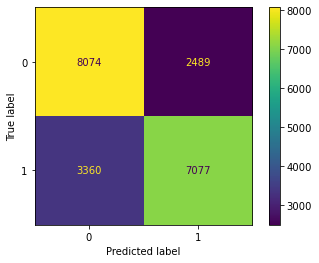

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     10563
           1       0.74      0.68      0.71     10437

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [12]:
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()
print(metrics.classification_report(ytest, y_pred))

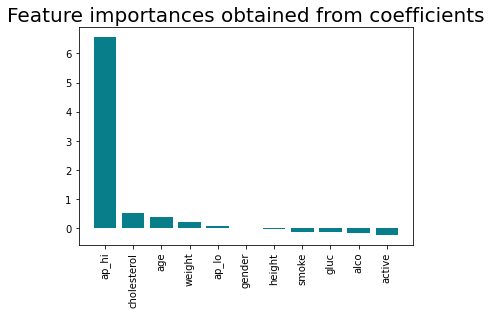

In [13]:
importances = pd.DataFrame(data={
    'Attribute': Xtrain.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by = 'Importance', ascending = False)
plt.bar(x = importances['Attribute'], height = importances['Importance'], color = '#087E8B')
plt.title('Feature importances obtained from coefficients', size = 20)
plt.xticks(rotation='vertical')
plt.show()